In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Getting Dataset

In [3]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = True, transform = transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = False, transform = transforms.Compose([transforms.ToTensor()]))

BATCH_SIZE = 128

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [4]:
from utils import train_loop, test_loop
from models import CNN_no_batch

num_epochs = 20
lr = 0.001

model = CNN_no_batch()
model.to(device= device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

tr_acc, te_acc = [], []
tr_loss, te_loss = [], []

best_acc = 0

for epoch in range(num_epochs):
    train_loss, train_correct = train_loop(train_loader, model, loss_fn, optimizer, device)
    test_loss, test_correct = test_loop(test_loader, model, loss_fn, device)

    print('Train Acc epoch {} : {} '.format(epoch, train_correct))
    print('Test Acc epoch {} : {} '.format(epoch, test_correct))

    tr_acc.append(train_correct)
    te_acc.append(test_correct)

    tr_loss.append(train_loss)
    te_loss.append(test_loss)


c:\Users\ianch\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Acc epoch 0 : 0.8207333333333333 
Test Acc epoch 0 : 0.8578 
Train Acc epoch 1 : 0.88545 
Test Acc epoch 1 : 0.8783 
Train Acc epoch 2 : 0.9018833333333334 
Test Acc epoch 2 : 0.8817 
Train Acc epoch 3 : 0.9123333333333333 
Test Acc epoch 3 : 0.8919 
Train Acc epoch 4 : 0.9207 
Test Acc epoch 4 : 0.8953 
Train Acc epoch 5 : 0.9263833333333333 
Test Acc epoch 5 : 0.8987 
Train Acc epoch 6 : 0.9305333333333333 
Test Acc epoch 6 : 0.8973 
Train Acc epoch 7 : 0.93415 
Test Acc epoch 7 : 0.8966 
Train Acc epoch 8 : 0.9370833333333334 
Test Acc epoch 8 : 0.8973 
Train Acc epoch 9 : 0.9395833333333333 
Test Acc epoch 9 : 0.8905 
Train Acc epoch 10 : 0.9417166666666666 
Test Acc epoch 10 : 0.8945 
Train Acc epoch 11 : 0.94495 
Test Acc epoch 11 : 0.8917 
Train Acc epoch 12 : 0.9470166666666666 
Test Acc epoch 12 : 0.9017 
Train Acc epoch 13 : 0.9503666666666667 
Test Acc epoch 13 : 0.8979 
Train Acc epoch 14 : 0.9501166666666667 
Test Acc epoch 14 : 0.8994 
Train Acc epoch 15 : 0.9517833

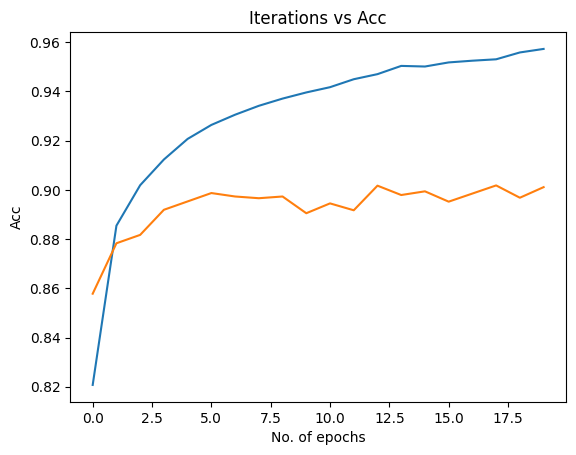

In [8]:
plt.plot(range(num_epochs), tr_acc)
plt.plot(range(num_epochs), te_acc)
plt.xlabel("No. of epochs")
plt.ylabel("Acc")
plt.title("Iterations vs Acc")
plt.show()

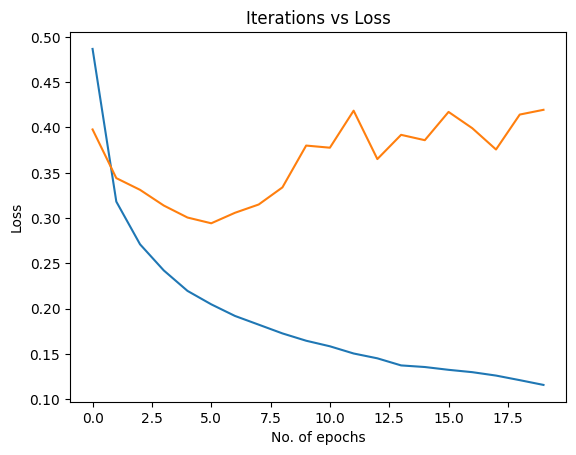

In [9]:
plt.plot(range(num_epochs), tr_loss)
plt.plot(range(num_epochs), te_loss)
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

In [10]:
print("Best Acc : {} | Best Epoch : {}".format(max(te_acc), te_acc.index(max(te_acc))))

Best Acc : 0.9018 | Best Epoch : 17


## Pickle out results and accuracies

In [13]:
import pickle
import os

file_name = 'baseline_CNN_no_batchnorm.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'wb') as file:
    pickle.dump(tr_acc, file)
    pickle.dump(te_acc, file)
    pickle.dump(tr_loss, file)
    pickle.dump(te_loss, file)

## Pickle in results and accuracies

In [14]:
file_name = 'baseline_CNN_no_batchnorm.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'rb') as file:
    tr_acc = pickle.load(file)
    te_acc = pickle.load(file)
    tr_loss = pickle.load(file)
    te_loss = pickle.load(file)


print(tr_acc)
print(te_acc)
print(tr_loss)
print(te_loss)

[0.8207333333333333, 0.88545, 0.9018833333333334, 0.9123333333333333, 0.9207, 0.9263833333333333, 0.9305333333333333, 0.93415, 0.9370833333333334, 0.9395833333333333, 0.9417166666666666, 0.94495, 0.9470166666666666, 0.9503666666666667, 0.9501166666666667, 0.9517833333333333, 0.9524833333333333, 0.95305, 0.9558333333333333, 0.9572666666666667]
[0.8578, 0.8783, 0.8817, 0.8919, 0.8953, 0.8987, 0.8973, 0.8966, 0.8973, 0.8905, 0.8945, 0.8917, 0.9017, 0.8979, 0.8994, 0.8952, 0.8985, 0.9018, 0.8968, 0.9011]
[0.48668535396869755, 0.31825744448058896, 0.27113505400447196, 0.24232201513323956, 0.21973410823833206, 0.204924406336823, 0.19211036778652846, 0.18248823227912886, 0.17283749245186605, 0.16476438195307627, 0.15862541849901682, 0.15068322622668007, 0.14535096859626934, 0.13753162773210864, 0.13575781162963238, 0.13267170738722725, 0.13007745660666717, 0.12632453641784724, 0.12126866527108242, 0.11600770708372089]
[0.39783764809747285, 0.34415419041355955, 0.3312280081872699, 0.3139135267